## Task 2: Simulated Annealing

### Download and load the dataset

In [ ]:
!curl https://raw.githubusercontent.com/hflabs/city/ae661bffe572880472249097c9b29c42b09650ea/city.csv > city.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  316k  100  316k    0     0   839k      0 --:--:-- --:--:-- --:--:--  839k


In [ ]:
import pandas as pd

df = pd.read_csv("city.csv")

df

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,"Ярославская обл, г Ростов",152150.0,Россия,Центральный,обл,Ярославская,р-н,Ростовский,г,Ростов,...,4,1,78410000000,78637101001,7609,UTC+3,57.205132,39.437862,31791,862
1113,"Ярославская обл, г Рыбинск",152900.0,Россия,Центральный,обл,Ярославская,р-н,Рыбинский,г,Рыбинск,...,4,1,78415000000,78715000001,7610,UTC+3,58.048550,38.858412,200771,1071
1114,"Ярославская обл, г Тутаев",152300.0,Россия,Центральный,обл,Ярославская,р-н,Тутаевский,г,Тутаев,...,4,1,78417000000,78643101001,7611,UTC+3,57.867499,39.536963,41001,1200
1115,"Ярославская обл, г Углич",152610.0,Россия,Центральный,обл,Ярославская,р-н,Угличский,г,Углич,...,4,1,78420000000,78646101001,7612,UTC+3,57.522425,38.302004,34505,1148


In [ ]:
# Get the top 30 cities by population

cities = df.sort_values("population", ascending=False).iloc[:30,:][ ['address', 'geo_lat', 'geo_lon']].reset_index()

cities

,index,address,geo_lat,geo_lon
0,509,г Москва,55.754047,37.620405
1,786,г Санкт-Петербург,59.939131,30.315900
2,647,г Новосибирск,55.028191,82.921149
3,832,г Екатеринбург,56.838522,60.605491
4,619,г Нижний Новгород,56.324063,44.005391
5,927,г Казань,55.794358,49.111497
6,782,г Самара,53.195031,50.106952
7,656,г Омск,54.984857,73.367452
8,1064,г Челябинск,55.160262,61.400808
9,757,г Ростов-на-Дону,47.222457,39.718803


In [ ]:
def get_city(name: str):
  return cities[cities['address'] == name].iloc[0, :]

In [ ]:
import numpy as np

def _distance_haversine(lat1, lon1, lat2, lon2):
    """
    Calculates the distance between 2 global coordinates in km
    """
    EARTH_RADIUS = 6371  # Radius of the earth in km
    dLat = np.deg2rad(lat2 - lat1)  # deg2rad below
    dLon = np.deg2rad(lon2 - lon1)
    a = np.sin(dLat / 2) * np.sin(dLat / 2) + np.cos(np.deg2rad(lat1)) * np.cos(np.deg2rad(lat2)) * np.sin(
        dLon / 2) * np.sin(dLon / 2)

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance_km = EARTH_RADIUS * c  # Distance in km
    return distance_km

def distance_cities(city1_name, city2_name):
  city1 = get_city(city1_name)
  city2 = get_city(city2_name)
  return _distance_haversine(city1.geo_lat, city1.geo_lon, city2.geo_lat, city2.geo_lon)

In [ ]:
from typing import List
import random

def random_permutation_of_cities() -> List[str]:
  city_names = list(cities['address'])
  random.shuffle(city_names)
  return city_names

def path_distance(city_names):
  result = 0
  city_names_closed_path = city_names + city_names[:1]
  for city1, city2 in zip(city_names_closed_path, city_names_closed_path[1:]):
    result += distance_cities(city1, city2)

  return result

def get_proposal(current_path):
  n_cities =len(current_path)

  ind1, ind2 = random.randint(0, n_cities-1), random.randint(0, n_cities-1)

  # Make sure to pick different cities
  while ind2 == ind1:
    ind2 = random.randint(0, n_cities-1)

  result = []

  for ind, city in enumerate(current_path):
    if ind == ind1:
      result.append(current_path[ind2])
    elif ind == ind2:
      result.append(current_path[ind1])

    else:
      result.append(city)

  return result

In [ ]:
def target_distribution(path, T):
  return np.exp(-path_distance(path) / T)

def accept(p):
  return random.uniform(0, 1) <= p

def updated_state(path, proposed_path, T):
  alpha = target_distribution(proposed_path, T)/target_distribution(path, T)

  if accept(alpha):
    return proposed_path
  else:
    return path

def update_temperature(T, factor):
  assert factor < 1 and factor > 0, "Invalid factor"
  return factor*T

In [ ]:
# Simulated annealing

def simulated_annealing(cooling_factor):
  x = random_permutation_of_cities()

  t = path_distance(x)/100

  # cooling_factor = 0.999

  paths = []
  distances = []

  for i in range(10000):
    if i % 1000 == 0:
      print("Current distance", path_distance(x))
      print("Temp", t)
      print("Iteration", i)
    # if i % 100:
    paths.append(x)
    distances.append(path_distance(x))
    x_proposal = get_proposal(x)

    x = updated_state(x, x_proposal, t)
    t = update_temperature(t, cooling_factor)

  return paths, distances

paths_slow, distances_slow = simulated_annealing(0.9999)
paths_middle, distances_middle = simulated_annealing(0.9975)
paths_fast, distances_fast = simulated_annealing(0.995)

Current distance 59976.35747680009
Temp 599.7635747680009
Iteration 0
Current distance 31049.82696255887
Temp 542.6858108083538
Iteration 1000
Current distance 27639.1246633803
Temp 491.0399724868952
Iteration 2000
Current distance 22494.450480580796
Temp 444.30911915823145
Iteration 3000
Current distance 22020.761949466625
Temp 402.025505922395
Iteration 4000
Current distance 26809.420672702454
Temp 363.76590180810257
Iteration 5000
Current distance 21844.72672193411
Temp 329.14735351096294
Iteration 6000
Current distance 23510.343102888703
Temp 297.8233522844657
Iteration 7000
Current distance 22007.120003516116
Temp 269.4803656168631
Iteration 8000
Current distance 22507.947707747255
Temp 243.83469897832342
Iteration 9000
Current distance 58561.0243718278
Temp 585.610243718278
Iteration 0
Current distance 25292.551663660128
Temp 47.919582295484
Iteration 1000


<ipython-input-7-00d70033f291>:8: RuntimeWarning: invalid value encountered in double_scalars
  alpha = target_distribution(proposed_path, T)/target_distribution(path, T)


Current distance 25033.334547431157
Temp 3.921185450571378
Iteration 2000
Current distance 25033.334547431157
Temp 0.3208645526783246
Iteration 3000
Current distance 25033.334547431157
Temp 0.026255851059138056
Iteration 4000
Current distance 25033.334547431157
Temp 0.0021484757636371075
Iteration 5000
Current distance 25033.334547431157
Temp 0.0001758064553511976
Iteration 6000
Current distance 25033.334547431157
Temp 1.4385970866540896e-05
Iteration 7000
Current distance 25033.334547431157
Temp 1.1771817898241544e-06
Iteration 8000
Current distance 25033.334547431157
Temp 9.632696876347895e-08
Iteration 9000
Current distance 69298.20553414023
Temp 692.9820553414023
Iteration 0


<ipython-input-7-00d70033f291>:8: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = target_distribution(proposed_path, T)/target_distribution(path, T)


Current distance 25987.639058471792
Temp 4.611080821936091
Iteration 1000
Current distance 25987.639058471792
Temp 0.0306819869036174
Iteration 2000
Current distance 25987.639058471792
Temp 0.00020415697679280396
Iteration 3000
Current distance 25987.639058471792
Temp 1.3584541087286431e-06
Iteration 4000
Current distance 25987.639058471792
Temp 9.039110955265556e-09
Iteration 5000
Current distance 25987.639058471792
Temp 6.014596027691289e-11
Iteration 6000
Current distance 25987.639058471792
Temp 4.0020932982625347e-13
Iteration 7000
Current distance 25987.639058471792
Temp 2.6629803056192934e-15
Iteration 8000
Current distance 25987.639058471792
Temp 1.77193872796391e-17
Iteration 9000


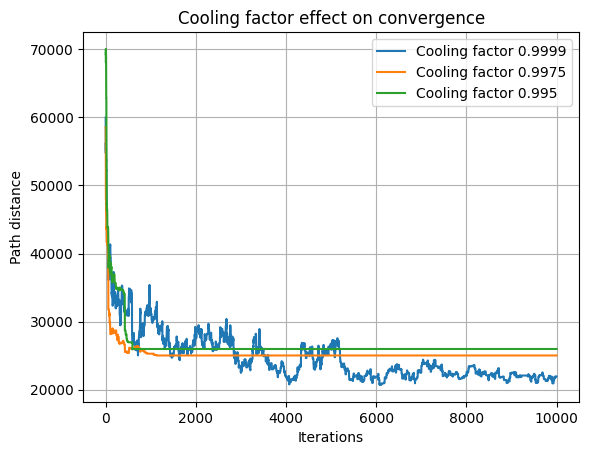

In [25]:
import matplotlib.pyplot as plt

plt.plot(distances_slow, label="Cooling factor 0.9999")
plt.plot(distances_middle, label="Cooling factor 0.9975")
plt.plot(distances_fast, label="Cooling factor 0.995")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Path distance")
plt.title("Cooling factor effect on convergence")
plt.grid()
plt.savefig('plots.png')
plt.show()

In [ ]:
!wget https://www.dropbox.com/s/sadvwkzbqjjurdv/russia.json?dl=1 -O russia.json

--2023-05-04 10:10:22--  https://www.dropbox.com/s/sadvwkzbqjjurdv/russia.json?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.70.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.70.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/sadvwkzbqjjurdv/russia.json [following]
--2023-05-04 10:10:22--  https://www.dropbox.com/s/dl/sadvwkzbqjjurdv/russia.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2c2e123ecf830fff98b677955e.dl.dropboxusercontent.com/cd/0/get/B7aXOLzVKzvQBAXkjhltIFdnElgZO1kWRg5U6514bOkZC83Ncj81SbFQLy7FsFgK98osJx6RY-zVgEYZDZqGFNvNoTMU-1-yyMTBO-a_g7DLtDbVOLZqPZ6uKRyL-Y2GW7vNFaIbhoS_3XEqSWFYR0DPVqcSO8nVkLegk7qwH_XSHEGaxtlBL8sWymbJXtMWhdU/file?dl=1# [following]
--2023-05-04 10:10:23--  https://uc2c2e123ecf830fff98b677955e.dl.dropboxusercontent.com/cd/0/get/B7aXOLzVKzvQBAXkjhltIFdnElgZO1kWRg5U6514bOkZC83Ncj81SbFQL

In [ ]:
import json

with open('russia.json') as f:
  russia_outline = json.loads(f.read())

russia_outline

[{'place_id': '198727998',
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': '60189',
  'boundingbox': ['41.1850968', '82.0586232', '-180', '180'],
  'lat': '64.6863136',
  'lon': '97.7453061',
  'display_name': 'Russia',
  'class': 'boundary',
  'type': 'administrative',
  'importance': 1.010267696876941,
  'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png',
  'geojson': {'type': 'MultiPolygon',
   'coordinates': [[[[-180, 62.5545579],
      [-179.9932642, 62.5622608],
      [-179.9675801, 62.5965243],
      [-179.954767, 62.6170965],
      [-179.9500119, 62.6296844],
      [-179.9498217, 62.6296684],
      [-179.9407933, 62.6525131],
      [-179.9342722, 62.6787564],
      [-179.9340863, 62.680552],
      [-179.9338626, 62.6970086],
      [-179.9353314, 62.7058315],
      [-179.9398672, 62.7404935],
      [-179.9401701, 62.7404852],
      [-179.9440435, 62.762924

In [ ]:
print(len(russia_outline[0]['geojson']['coordinates'][0][0]))

flattened_coordinates = [z for x in russia_outline[0]['geojson']['coordinates'] for y in x for z in y]

print(len(flattened_coordinates))

assert all(map(lambda x: len(x) == 2, flattened_coordinates))

22
104804


In [ ]:
import matplotlib.pyplot as plt



def draw_russia_outline(ax):
  for polygon in russia_outline[0]['geojson']['coordinates']:
    closed_polygon = polygon[0] + polygon[0][:1]

    lat = [x[0] for x in closed_polygon]
    lon = [x[1] for x in closed_polygon]

    if lat[0] < 0:
      lat = [x + 360 for x in lat]

    ax.plot(lat, lon, color="black")


In [ ]:
# Animation part
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
rc('animation', embed_limit=50)
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot()
ax.grid()



line,  =ax.plot([], [])
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def get_path_coordinates(city_names):
  lat, lon = [], []
  city_names_closed = city_names + city_names[:1]
  for city_name in city_names_closed:
    city = get_city(city_name)
    lat.append(city.geo_lat)
    lon.append(city.geo_lon)
  return lon, lat, city_names_closed


draw_russia_outline(ax)

cities_lon, cities_lat, cities_names = get_path_coordinates(random_permutation_of_cities())

ax.scatter(cities_lon, cities_lat)

for i, name in enumerate(cities_names):
  ax.annotate(name, (cities_lon[i], cities_lat[i]))


path_sample = paths_slow[::100]

init_temp = path_distance(paths_slow[0])/100

def draw_path(i):
  line.set_data(*get_path_coordinates(path_sample[i])[:2])
  fig.suptitle(f"Temp: {init_temp*(0.9999)**(100*i)}, Dist: {path_distance(path_sample[i])}km")
  return line, 


ani = animation.FuncAnimation(
    fig, draw_path, len(path_sample), interval=500, blit=True)
# plt.show()
fig.savefig('map.png')
ani

In [26]:
print(distances_slow[-1])

# print(len(paths))

21953.641556537783


In [29]:
ani.save('animation.mp4')